# Tópico 7 - Redução de Dimensionalidade

A redução de dimensionalidade é, normalmente, uma técnica do tipo Não Supervisionada. Isto ocorre pois, em geral, não há rótulos da representação de uma tupla de entrada para uma nova tupla de dimensão reduzida como saída.

A ideia central da redução de dimensionalidade é permitir representar um espaço de muitas dimensões com poucas dimensão, permitindo a visualização ou auxiliando na representação de uma entrada para um outro algoritmo de Aprendizado de Máquina.

Vamos estudar alguns exemplos de aplicação dessas técnicas.

### Bibliotecas importadas

In [ ]:
# Geral
import pandas as pd  # Trabalhar com tabelas
import numpy as np

# Datasets
from sklearn.datasets import load_iris

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree 

# Aprendizado de Máquina - Redução de dimensionalidade
from sklearn.decomposition import PCA, KernelPCA   
from sklearn.manifold import TSNE,  Isomap 

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Escalonador
from sklearn.preprocessing import StandardScaler

## Exemplo 1 - Botânica: Íris Dataset

Esse dataset contém medidas da largura e comprimento da pétala e da sépala de 150 amostras de flores, assim como a espécie de cada uma (*versicolor*, *setosa*, *virginica*). Mais informações: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="dieta" width="600px">




### (a) Visualização

In [ ]:
# 1. Carregandos os dados
iris = load_iris()
X = iris.data
y = iris.target

# 2. Realizando o escalonamento
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# 3. Gerando uma visualização dos dados
# Observe que temos 4 atributos e somos incapazes de gerar uma visualização 4D 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_dataset_scatterplot.svg" alt="dieta" width="600px">

In [ ]:
# 4. Gerando a redução de dimensionalidade com algoritmos não supervisionados

# Não supervisionado recebe apenas x (varias colunas de atributos)

# PCA
pca = PCA(n_components=2) # Queremos 2 componentes pois queremos 2 eixos X e Y apenas
X_pca = pca.fit_transform(X_scaled) # Usando dados escalonados


# kPCA
kpca = KernelPCA(n_components=2, kernel='sigmoid', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)


# t-SNE
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X)

# Isomap
isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Com a nova representação, reduzimos 4 features de entrada para 2 features. Podemos plotar uma dispersão disso:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

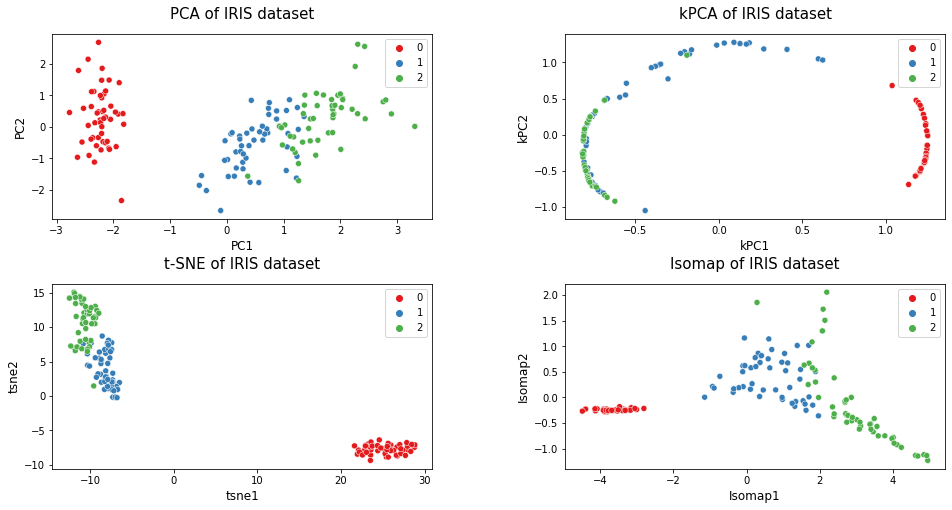

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16 ,8))

# Plot dos gráficos
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0][0])
sns.scatterplot(X_kpca[:,0], X_kpca[:,1], hue=y, palette='Set1', ax=ax[0][1])
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1', ax=ax[1][0])
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=y, palette='Set1', ax=ax[1][1])

# Títulos
ax[0][0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[0][1].set_title("kPCA of IRIS dataset", fontsize=15, pad=15)
ax[1][0].set_title("t-SNE of IRIS dataset", fontsize=15, pad=15)
ax[1][1].set_title("Isomap of IRIS dataset", fontsize=15, pad=15)

# Nome dos eixos
ax[0][0].set_xlabel("PC1", fontsize=12)
ax[0][0].set_ylabel("PC2", fontsize=12)

ax[0][1].set_xlabel("kPC1", fontsize=12)
ax[0][1].set_ylabel("kPC2", fontsize=12)

ax[1][0].set_xlabel("tsne1", fontsize=12)
ax[1][0].set_ylabel("tsne2", fontsize=12)

ax[1][1].set_xlabel("Isomap1", fontsize=12)
ax[1][1].set_ylabel("Isomap2", fontsize=12)

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 0.35, hspace=0.35)

### (b) Importância de um atributo

Outra forma de reduzir a dimensionalidade é através da **Seleção de Features**. Existem formas supervisionadas e não supervisionadas de fazer isso. Aqui vamos aplicar uma técnica supervisionada.

Esta etapa também é conhecida como  Recursive Feature Elimination (RFE). 

<font color='red'>Atenção:</font> para sermos metodologicamente mais robustos, é necessário fazer o treinamento e teste usando uma validação cruzada ou técnica semelhante de separação de dados. Aqui como exemplo introdutório simplificado, não iremos fazer isso.

Feature importances:  [0.08540008 0.01123495 0.45846811 0.44489686]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Text(0.5, 1.0, 'Visualizing Important Features')

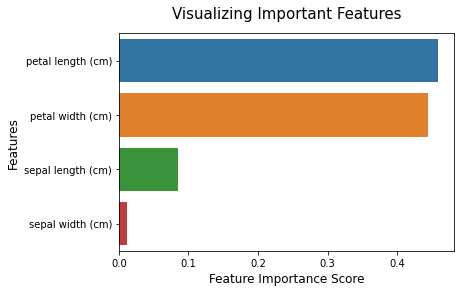

In [ ]:
# Usandos RandomForest

# 1. Criando a RandomForest
rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
# 2. Treinando a RandomForest
rf.fit(X, y) # Supervisionado recebe x e y


# 3. Mostrando a importância associada a cada atributo (feature)
print('Feature importances: ', rf.feature_importances_)
print('Feature names:', iris.feature_names)

# 4. Representando na forma de um gráfico
feature_imp = pd.Series(rf.feature_importances_, 
                        index=iris.feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

Pela imagem anterior vemos que a feature <code>sepal width</code> contribui muito pouco para uma tarefa de classificação, de forma que podemos desconsiderar esse atributo.

Agora que temos apenas 3 colunas de dados, podemos fazer uma visualização 3D tradicional

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 0, 'sepal length (cm)')

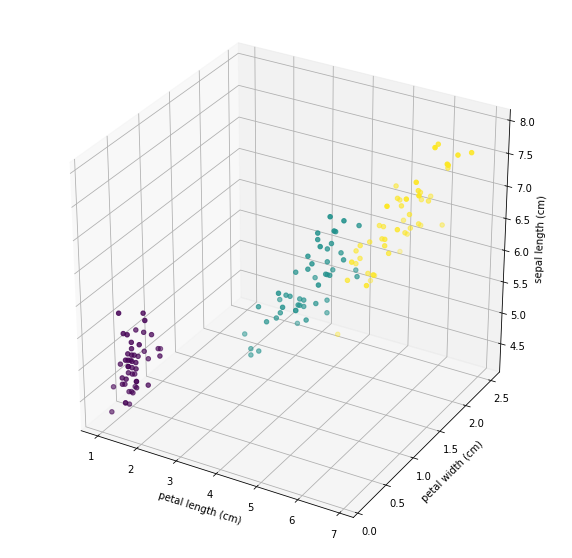

In [ ]:
# Representacao 3D (eu nao tenho mais 4D)
ix = df['petal length (cm)']
iy = df['petal width (cm)']
iz = df['sepal length (cm)']

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(ix,iy,iz,
             c=iris.target)

ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_zlabel('sepal length (cm)')

In [ ]:
# 1. Retirar a coluna que não desejamos
X = df.drop(columns=['sepal width (cm)'])

# 2. Realizando o escalonamento
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


# 3. Gerando a redução de dimensionalidade com algoritmos não supervisionados

# PCA
pca = PCA(n_components=2) # Queremos 2 componentes pois queremos 2 eixos X e Y apenas
X_pca = pca.fit_transform(X_scaled) # Usando dados escalonados

# kPCA
kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X_scaled)

# t-SNE
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

# Isomap
isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

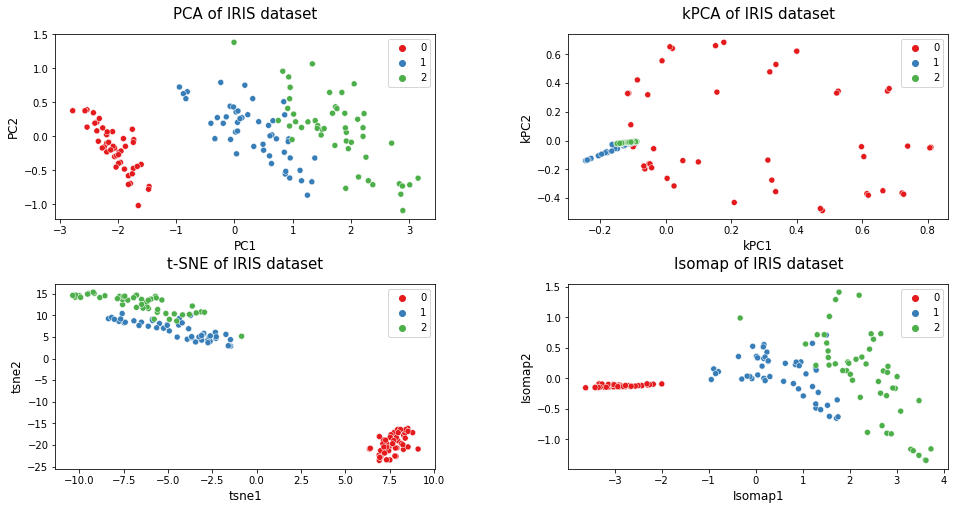

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16 ,8))

# Plot dos gráficos
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0][0])
sns.scatterplot(X_kpca[:,0], X_kpca[:,1], hue=y, palette='Set1', ax=ax[0][1])
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1', ax=ax[1][0])
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=y, palette='Set1', ax=ax[1][1])

# Títulos
ax[0][0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[0][1].set_title("kPCA of IRIS dataset", fontsize=15, pad=15)
ax[1][0].set_title("t-SNE of IRIS dataset", fontsize=15, pad=15)
ax[1][1].set_title("Isomap of IRIS dataset", fontsize=15, pad=15)

# Nome dos eixos
ax[0][0].set_xlabel("PC1", fontsize=12)
ax[0][0].set_ylabel("PC2", fontsize=12)

ax[0][1].set_xlabel("kPC1", fontsize=12)
ax[0][1].set_ylabel("kPC2", fontsize=12)

ax[1][0].set_xlabel("tsne1", fontsize=12)
ax[1][0].set_ylabel("tsne2", fontsize=12)

ax[1][1].set_xlabel("Isomap1", fontsize=12)
ax[1][1].set_ylabel("Isomap2", fontsize=12)

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 0.35, hspace=0.35)

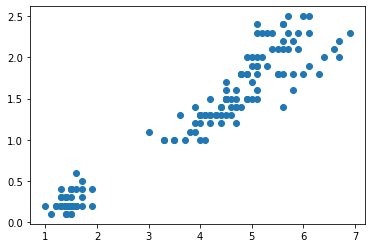

In [ ]:
# 1. Retirar a coluna que não desejamos
X = df.drop(columns=['sepal width (cm)', 'sepal length (cm)'])

plt.plot(X['petal length (cm)'],X['petal width (cm)'], 'o')

In [ ]:
# Usando RFE (Eliminação Retrógrada)

# 1. Dados
X = iris.data
y = iris.target

# 2. Usando estimadores
estimator = LogisticRegression(max_iter=150) 
#DecisionTree
#RandomForest
# O estimado tem que ser um método supervisionado que solte coeficientes
# Significa: y = a1x1+a2x2+a3x3 regressoa 

# a1 = 100
# a2 = 0.0002

selector = RFE(estimator, n_features_to_select=3, step=1)
selector.fit(X, y)  # Supervisionado passando x e y
X_selected = selector.transform(X)

print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print('Data with selected features')
print(pd.DataFrame(X_selected).head())

Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Data with selected features
     0    1    2
0  3.5  1.4  0.2
1  3.0  1.4  0.2
2  3.2  1.3  0.2
3  3.1  1.5  0.2
4  3.6  1.4  0.2


----------------

## Exercício 1  - Ciência de Materiais

Os dados aqui apresentados foram retirados de:

Materials Project: https://www.materialsproject.org/

Mineração de Texto para Síntese de Materiais: https://github.com/CederGroupHub/text-mined-synthesis_public

Tabela Periódica em Python - Mendeleev: https://mendeleev.readthedocs.io/en/stable/

Os dados foram agrupados e filtrados, compreendendo ao final uma série de compostos inorgânicos ternários.

- A) Encontre agrupamentos
- B) Faça visualização dos dados usando redução de dimensionalidade. Refaça o item (A) para as novas dimensões.
- C) Crie um classificador ou regressor para prever alguma propriedade
- D) Use redução de dimensionalidade supervisionada para elimitar features do passo c

In [ ]:
df = pd.read_csv('sintese_ternarios.csv')

In [ ]:
df.head()

In [ ]:
len(df)